In [42]:
import numpy as np
import blimpy as bl
import pylab as plt
import inspect
import turbo_seti
from turbo_seti.find_doppler.find_doppler import FindDoppler
import turbo_seti
%matplotlib inline

In [227]:
fb2 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil',
                  f_start=1419.9, f_stop=1420.9)
fb2.info()


--- File Info ---
    telescope_id :                                4
           nbits :                               32
     source_name :                        ProxCen_S
       data_type :                                1
          nchans :                         33554432
           ibeam :                                1
     barycentric :                                0
   pulsarcentric :                                0
           tsamp :                        16.777216
            foff :          -3.814697265625e-06 MHz
         src_raj :                     14:29:42.949
         src_dej :                     -61:59:53.84
   tstart (ISOT) :          2019-04-29T13:47:46.000
    tstart (MJD) :               58602.574837962966
          nbeams :                                1
            fch1 :                       1472.0 MHz
            nifs :                                1

Num ints in file :                              107
      File shape :               (107, 1, 33

Checking out 21cm hydrogen emission of the file I am running turboSETI on

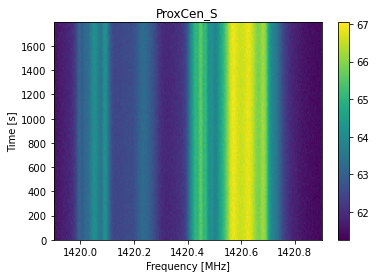

In [117]:
fb2.plot_waterfall(logged=True)

In [24]:
dop = FindDoppler('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil', 1, snr=25,
                  out_dir='turboSETIout/')

In [25]:
dop.get_info()

'File: turboSETIout/blc06_ProxCen_S_2019-04-29T13:47:46.000.h5\n drift rates (min, max): (0.000000, 1.000000)\n SNR: 25.000000\n'

In [26]:
dop.search()

In [105]:
df = turbo_seti.find_event.make_table('blc06_ProxCen_S_2019-04-29T13:47:46.000.dat')

In [198]:
df=df.sort_values('SNR',ascending=False)
df

,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,Source,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range
55,56,-0.000000,7.506979e+08,1408.000000,0,1408.000000,1407.995911,16,23374,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
57,58,-0.998744,7.029739e+06,1404.000996,1048315,1404.005093,1404.000004,16,23374,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
56,57,0.652371,7.029739e+06,1407.999348,171,1408.000000,1407.995258,16,23374,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
233,234,0.017000,3.193607e+03,1375.138779,225764,1375.142876,1375.134689,24,327764,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
17,18,-0.000000,2.913880e+03,1440.000000,0,1440.000000,1439.995911,8,446594,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,0.565247,2.623756e+01,1386.134731,488969,1386.138828,1386.130642,21,2661,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
259,260,0.019125,2.592913e+01,1365.363411,691166,1365.367508,1365.359322,26,117,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
12,13,-0.000000,2.553516e+01,1442.000000,524288,1442.004097,1441.995911,7,2039,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,
5,6,0.038250,2.551200e+01,1455.320015,178254,1455.324112,1455.315926,4,73,46.000.h5,PROXCEN_S,58602.574837962966,14h29m42.949s,-61d59m53.84s,16.777216,-3.814697,,,,


Plotting hit number 234

In [214]:
#start and end frequencies
print(df.iloc[3,5],df.iloc[3,6])

1375.142876 1375.134689


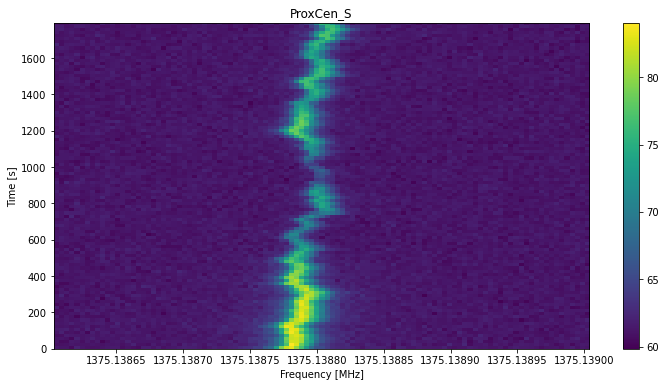

In [243]:
#plotting the highest SNR hit
fb2 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil',
                  f_start=1375.1386,f_stop=1375.1390)
fig, ax = plt.subplots(figsize=(12,6))
fb2.plot_waterfall(logged=True)

extracting integration 0...


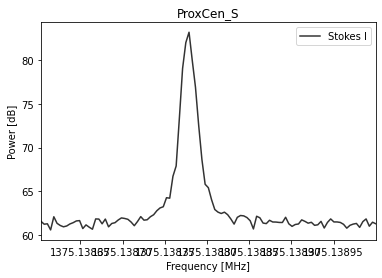

In [242]:
fb2.plot_spectrum(logged=True)

Files to look at for ON/OFF: <br/>
**OFF** /mnt_blpd2/datax/PKSUWL/blc10/PKSUWL/blc10_1421-490_ND_S_2019-04-29T12:53:57.000.fil <br/>
**ON** /mnt_blpd2/datax/PKSUWL/blc10/PKSUWL/blc10_ProxCen_S_2019-04-29T13:02:35.000.fil <br/>
**OFF** /mnt_blpd2/datax/PKSUWL/blc10/PKSUWL/blc10_1421-490_S_2019-04-29T13:34:59.000.fil <br/>
**ON** /mnt_blpd2/datax/PKSUWL/blc10/PKSUWL/blc10_ProxCen_S_2019-04-29T13:47:46.000.fil  <br/>
**OFF** /mnt_blpd2/datax/PKSUWL/blc10/PKSUWL/blc10_1934-638_S_2019-04-29T14:21:18.000.fil<br/>

Searches are completed in 'runTurbo.ipynb' so this kernal remains operational

test
